In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.family'] = 'DejaVu Sans'


def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Filled Colors
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    # Contour line
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    # Calculate -log densities
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),   # normalize using log normal
                 levels=np.logspace(0, 2, 12))        # 12 levels
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])   # get cluster
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [2]:
X = pd.read_csv('creditcard.csv')

X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Примерное количество кластеров

In [5]:
y=[1,2,3]

In [38]:
#Basic EDA

#Попробуем как-то визуализировать данные.

#Данные содержат 31 компоненту. Посмотрим, что будет, если визуализировать первые две из них.


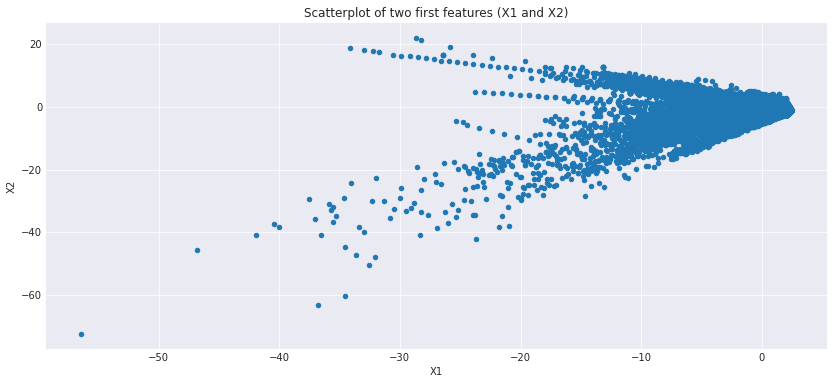

In [11]:
plt.figure(figsize=(14, 6))

plt.scatter(X.V1, X.V2, s=20, cmap='coolwarm')

plt.title('Scatterplot of two first features (X1 and X2)')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

Ничего непонятно. Давайте попробуем воспользоваться PCA!


Не забудем в начале нормализовать данные.



In [12]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [13]:
pca = PCA()
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

In [14]:
X_pca.shape

(284807, 31)

Визуализация PCA

Давайте сравним, как изменилась картина после применения PCA.

Еще раз вспомним, как выглядели исходные данные.


In [20]:
X_pca

array([[ 0.41840572,  0.70729942, -2.43143458, ...,  0.27682975,
         0.04402398, -0.02122893],
       [-0.39215515,  0.57786346, -1.99583528, ...,  0.7651219 ,
         0.0172835 ,  0.01463266],
       [ 1.87033874,  0.69891193, -2.43316022, ...,  0.21514103,
         0.06878427,  0.13472422],
       ...,
       [-0.19552394, -0.56355589,  1.99394159, ..., -0.24308175,
         0.09006187, -0.00450519],
       [-0.46877931, -0.43659524,  1.14684875, ..., -1.07904216,
        -0.0181382 ,  0.02444206],
       [ 0.76474332, -0.61543498,  1.80557436, ..., -0.45042683,
         0.01215634,  0.10872732]])

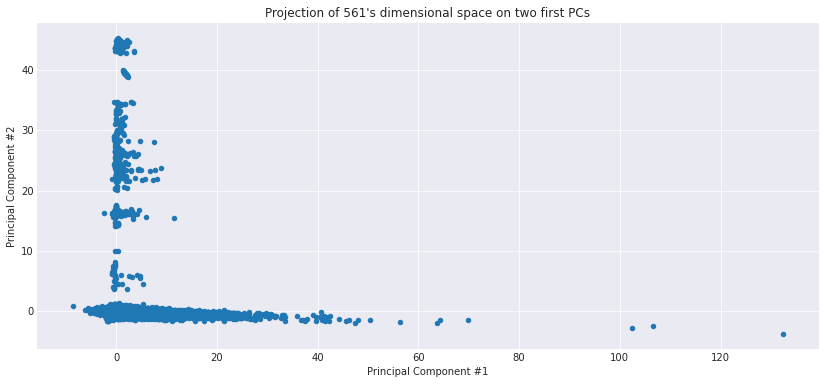

In [22]:
plt.figure(figsize=(14, 6))

plt.scatter(X_pca[:,0], X_pca[:,1], s=20, cmap='coolwarm')

plt.title('Projection of 561\'s dimensional space on two first PCs')
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')

plt.show()

Кажется, отличный результат. Давайте для решения задачи кластеризации перейдем к главным компонентам. Для удобства визуализации возьмем первые 2 (главные) компоненты.

In [24]:
X_two_dim = X_pca[:, :2]

idx = (X_two_dim[:,0] < 50) & (X_two_dim[:,1] < 15)

X_two_dim = X_two_dim #[idx,:]

k-Means

Sklearn implementation

В качестве дефолтного baseline обучим самый простой kmeans с кластеризацией на 2 кластера.


In [26]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_two_dim)

KMeans(n_clusters=2)

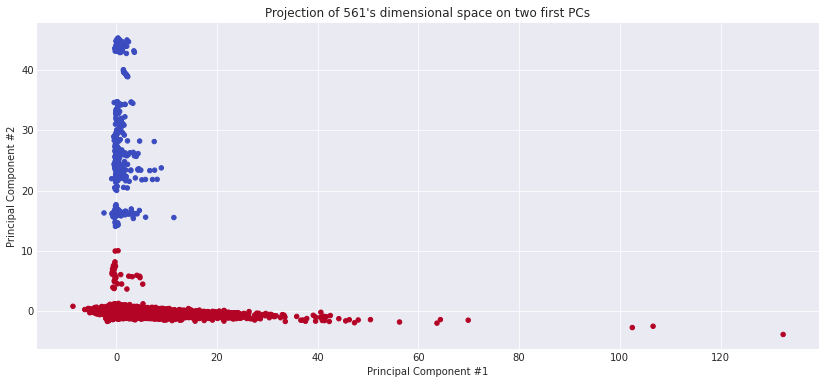

In [27]:
plt.figure(figsize=(14, 6))

plt.scatter(X_two_dim[:,0], X_two_dim[:,1], c=kmeans.labels_, s=20, cmap='coolwarm');

plt.title('Projection of 561\'s dimensional space on two first PCs')
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')

plt.show()

Визуализируем центроиды и разделяющие классы гиперплоскость.

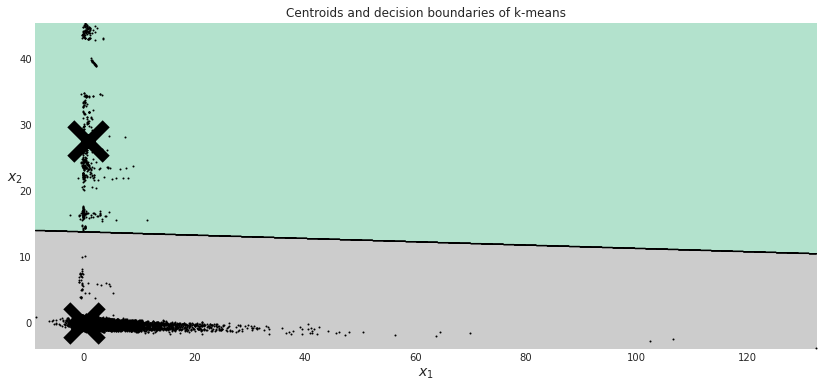

In [28]:
plt.figure(figsize=(14, 6))
plot_decision_boundaries(kmeans, X_two_dim)

plt.title('Centroids and decision boundaries of k-means')

plt.show()

Также можем получить предсказания для отдельной точки.

In [30]:
X_two_dim[:1,:]

array([[0.41840572, 0.70729942]])

In [31]:
kmeans.predict(X_two_dim[:1,:])

array([1], dtype=int32)

In [32]:
a = kmeans.transform(X_two_dim[:1,:])

print(a)

[[26.8488794   0.86719153]]


Выбор числа кластеров

Не всегда есть возможность визуализировать датасет, поэтому давайте попробуем выбрать число кластеров 𝑘

автоматически с помощью метода локтя.

Посчитаем индекс инерции для kmeans с числом кластеров в диапазоне он 1 до 10.

In [33]:
k_max = 10

inertia = []
for k in range(1, k_max):

    kmeans = KMeans(n_clusters=k).fit(X_two_dim)
    
    inertia.append(np.sqrt(kmeans.inertia_))

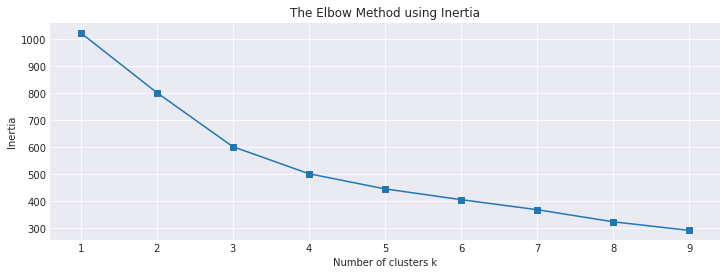

In [34]:
plt.figure(figsize=(12, 4))
plt.plot(range(1, k_max), inertia, marker='s')

plt.title('The Elbow Method using Inertia')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')

plt.show()

Из графика следует, что оптимальное число кластеров в данном случае -3.

In [35]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X_two_dim)

KMeans(n_clusters=3)

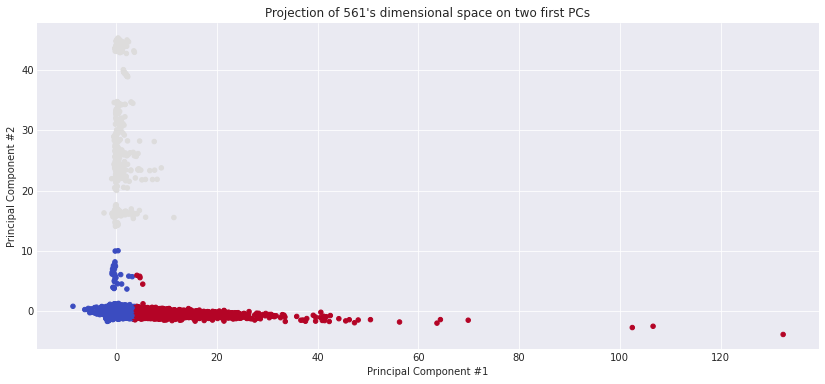

In [36]:
plt.figure(figsize=(14, 6))

plt.scatter(X_two_dim[:,0], X_two_dim[:,1], c=kmeans.labels_, s=20, cmap='coolwarm');

plt.title('Projection of 561\'s dimensional space on two first PCs')
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')

plt.show()

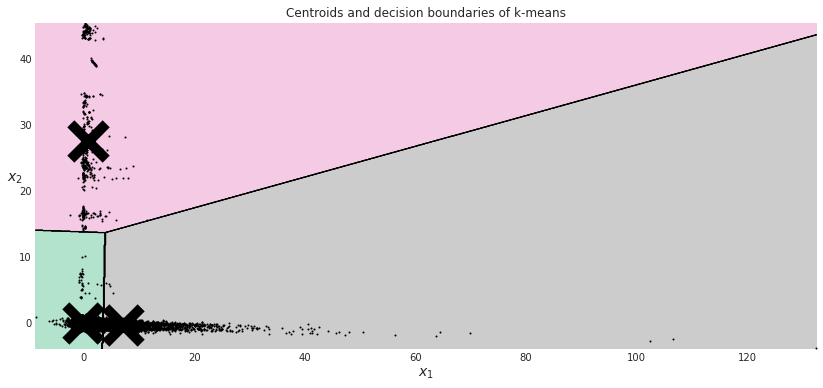

In [37]:
plt.figure(figsize=(14, 6))
plot_decision_boundaries(kmeans, X_two_dim)

plt.title('Centroids and decision boundaries of k-means')

plt.show()